# An Illustration of Gradient Boosting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

%matplotlib inline

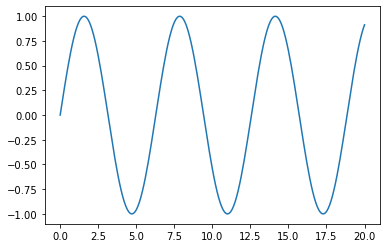

In [2]:
X = np.linspace(0, 20, 201)
y = np.sin(X)

fig, ax = plt.subplots()
ax.plot(X, y);

### Step 1 

Here, all we are doing is using an average of our values as a model of our data. Note that the "actual function" of our data is a sine curve. We are going to try to approximate that by way of gradient boosting and a decision tree regressor!

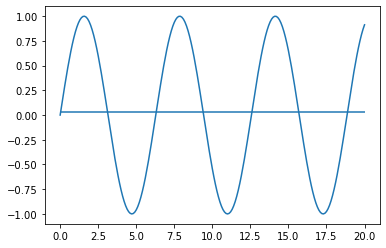

In [3]:
fig, ax = plt.subplots()
ax.plot(X, y)
f0 = y.mean()
ax.hlines(f0, 0, 20);

##### OK, so we have our extremely basic, extremely inaccurate model. Let's go ahead and build off of that.

In [4]:
f0

0.031695117091746196

In [5]:
# Residuals

e0 = y - f0
e0

array([-0.03169512,  0.0681383 ,  0.16697421,  0.26382509,  0.35772323,
        0.44773042,  0.53294736,  0.61252257,  0.68566097,  0.75163179,
        0.80977587,  0.85951224,  0.90034397,  0.93186307,  0.95375461,
        0.96579987,  0.96787849,  0.95996969,  0.94215251,  0.91460497,
        0.87760231,  0.83151425,  0.77680129,  0.7140101 ,  0.64376806,
        0.56677703,  0.48380625,  0.39568476,  0.30329303,  0.20755421,
        0.10942489,  0.00988555, -0.09006926, -0.18944081, -0.28723622,
       -0.38247834, -0.47421556, -0.56153126, -0.64355301, -0.71946128,
       -0.78849761, -0.84997223, -0.90327089, -0.94786105, -0.98329719,
       -1.00922523, -1.02538612, -1.03161837, -1.02785973, -1.01414773,
       -0.99061939, -0.9575098 , -0.91514977, -0.86396256, -0.8044596 ,
       -0.73723544, -0.66296175, -0.58238066, -0.4962973 , -0.40557178,
       -0.31111062, -0.21385762, -0.11478452, -0.01488122,  0.08485409,
        0.18342487,  0.27984625,  0.3731548 ,  0.46241823,  0.54

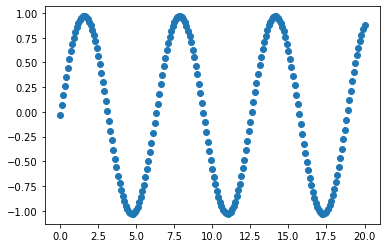

In [6]:
## Plotting residuals

fig, ax = plt.subplots()
ax.scatter(X, e0);

### Step 2: fitting a "stump" to the residuals

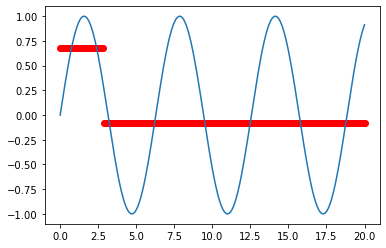

In [7]:
data = X.reshape(-1, 1)
f1 = DecisionTreeRegressor(max_depth=1)

f1.fit(data, e0)
ensemble_preds_1 = f1.predict(data) + f0

fig, ax = plt.subplots()
ax.plot(X, y)
ax.scatter(X, ensemble_preds_1,
          c='r');

In [8]:
# The DecisionTreeRegressor is minimizing
# mean squared error. Since we're only
# splitting once, we're simply predicting
# the mean of each of the two groups formed
# by the split.

mses = []
for j in range(1, 63):
    mse = sum((e0[:j] - e0[:j].mean())**2)
    mse += sum((e0[j:] - e0[j:].mean())**2)
    mses.append(mse)
mses.index(min(mses))

28

In [9]:
mses

[98.35723476072684,
 98.35757363740538,
 98.34424250203996,
 98.3025572782442,
 98.21865839134807,
 98.07997868496183,
 97.87567438608298,
 97.5970054101996,
 97.23765281774494,
 96.79396315286931,
 96.26511165458031,
 95.65317885704343,
 94.96313780917706,
 94.20275195599474,
 93.38238654413964,
 92.5147391497795,
 91.614497488994,
 90.69793497493018,
 89.78245645657188,
 88.88610814605637,
 88.02706686323143,
 87.22312436058724,
 86.49118261792924,
 85.8467756101719,
 85.30363216640924,
 84.87329318356585,
 84.56479467868365,
 84.38442601959737,
 84.33557023586283,
 84.41863066152756,
 84.63104538680055,
 84.96738818905648,
 85.41955186789014,
 85.97700731485962,
 86.62712929148265,
 87.35557784611858,
 88.14672263783976,
 88.984096206475,
 89.85086147101913,
 90.73027847573488,
 91.60615563988596,
 92.46327149148897,
 93.28775404960382,
 94.06740661983349,
 94.7919707262521,
 95.45331915039651,
 96.04557450522174,
 96.56515135331838,
 97.01072249475529,
 97.38311261058305,
 97.68512

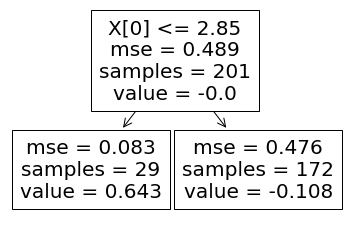

In [10]:
plot_tree(f1);

In [11]:
e0[:29].mean()

0.6432541793709723

In [12]:
e0[29:].mean()

-0.10845564652185001

In [13]:
f1.predict(data)

array([ 0.64325418,  0.64325418,  0.64325418,  0.64325418,  0.64325418,
        0.64325418,  0.64325418,  0.64325418,  0.64325418,  0.64325418,
        0.64325418,  0.64325418,  0.64325418,  0.64325418,  0.64325418,
        0.64325418,  0.64325418,  0.64325418,  0.64325418,  0.64325418,
        0.64325418,  0.64325418,  0.64325418,  0.64325418,  0.64325418,
        0.64325418,  0.64325418,  0.64325418,  0.64325418, -0.10845565,
       -0.10845565, -0.10845565, -0.10845565, -0.10845565, -0.10845565,
       -0.10845565, -0.10845565, -0.10845565, -0.10845565, -0.10845565,
       -0.10845565, -0.10845565, -0.10845565, -0.10845565, -0.10845565,
       -0.10845565, -0.10845565, -0.10845565, -0.10845565, -0.10845565,
       -0.10845565, -0.10845565, -0.10845565, -0.10845565, -0.10845565,
       -0.10845565, -0.10845565, -0.10845565, -0.10845565, -0.10845565,
       -0.10845565, -0.10845565, -0.10845565, -0.10845565, -0.10845565,
       -0.10845565, -0.10845565, -0.10845565, -0.10845565, -0.10

### Step 3: fitting another "stump" to the residuals of the previous model

In [14]:
e1 = y - (f0 + f1.predict(data))

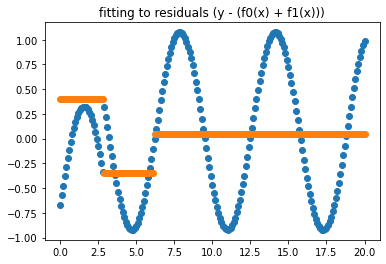

In [15]:
f2 = DecisionTreeRegressor(max_depth=1)
f2.fit(data, e1)
ensemble_preds_2 = f1.predict(data) + f2.predict(data) + f0

fig, ax = plt.subplots()
ax.scatter(X, e1)
ax.scatter(X, ensemble_preds_2)
plt.title('fitting to residuals (y - (f0(x) + f1(x)))');

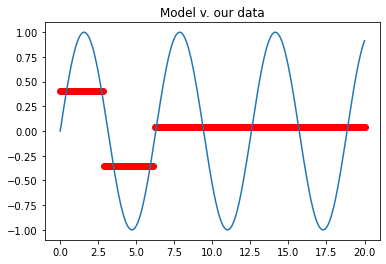

In [16]:
fig, ax = plt.subplots()
ax.plot(X, y)
ax.scatter(X, ensemble_preds_2,
          c='r')
plt.title('Model v. our data');

### Fitting yet another "stump"

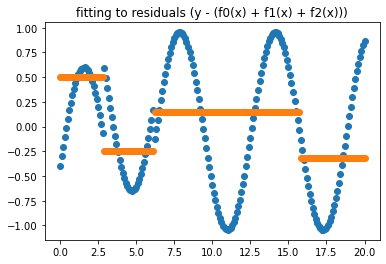

In [17]:
e2 = y- (f2.predict(data) + f1.predict(data) + f0)
f3 = DecisionTreeRegressor(max_depth=1)
f3.fit(data, e2)

fig, ax = plt.subplots()
ax.scatter(X, e2)
ensemble_preds_3 = f3.predict(data) + f2.predict(data) + f1.predict(data) + f0
ax.scatter(X, ensemble_preds_3)
plt.title('fitting to residuals (y - (f0(x) + f1(x) + f2(x)))');

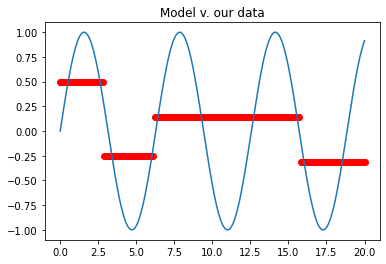

In [18]:
fig, ax = plt.subplots()
ax.plot(X, np.sin(X))
ax.scatter(X, ensemble_preds_3,
          c='r')
plt.title('Model v. our data');

### Another one

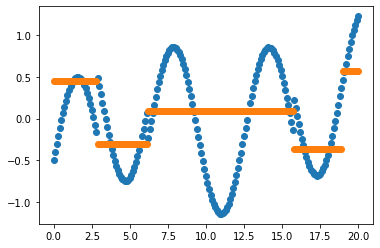

In [19]:
e3 = y - (f3.predict(data) + f2.predict(data) + f1.predict(data) + f0)
f4 = DecisionTreeRegressor(max_depth=1)
f4.fit(data, e3)

fig, ax = plt.subplots()
ax.scatter(X, e3)
ensemble_preds_4 = f4.predict(data) + f3.predict(data) + f2.predict(data)\
    + f1.predict(data) + f0
ax.scatter(X, ensemble_preds_4);

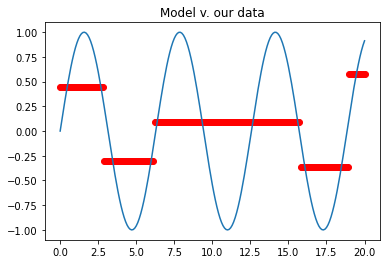

In [20]:
fig, ax = plt.subplots()
ax.plot(X, np.sin(X))
ax.scatter(X, ensemble_preds_4,
          c='r')
plt.title('Model v. our data');

### and another

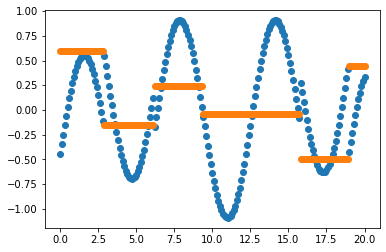

In [31]:
e4 = y - (f4.predict(data) + f3.predict(data) + f2.predict(data)\
                  + f1.predict(data) + f0)
f5 = DecisionTreeRegressor(max_depth=1)
f5.fit(data, e4)

fig, ax = plt.subplots()
ax.scatter(X, e4)
ensemble_preds_5 = f5.predict(data) + f4.predict(data) + f3.predict(data)\
    + f2.predict(data) + f1.predict(data) + f0
ax.scatter(X, ensemble_preds_5);

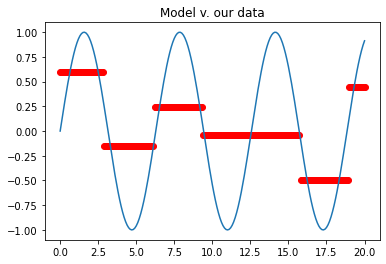

In [32]:
fig, ax = plt.subplots()
ax.plot(X, np.sin(X))
ax.scatter(X, ensemble_preds_5,
          c='r')
plt.title('Model v. our data');

### Let's make a function already!

In [23]:
def simple_boosting_algorithm(X, y, n_learners, learner,
                              learning_rate, show_each_step=True):
    """Performs a simple ensemble boosting model 
    params: show_each_step - if True, will show with each additional learner"""
    f0 = y.mean()
    residuals = y - f0
    
    # This next line fills an array of len(y) with the mean of y.
    ensemble_predictions = np.full(len(y), fill_value=f0)
    fig, ax = plt.subplots(figsize=(20, 10))

    for i in range(n_learners):
        residuals = y - ensemble_predictions
        f = learner.fit(X.reshape(-1, 1), residuals)
        ensemble_predictions = learning_rate * f.predict(X.reshape(-1, 1)) +\
        ensemble_predictions
        if show_each_step:
            ax.plot(X, y)
            ax.scatter(X, ensemble_predictions,
                      c='r')
            
    ax.plot(X, y)
    ax.scatter(X, ensemble_predictions,
              c='r')
            
    plt.title('With ' + str(n_learners) + ' learners with a depth of '+\
              str(learner.max_depth) +\
              ' and a learning rate of '+ str(learning_rate))
    
   

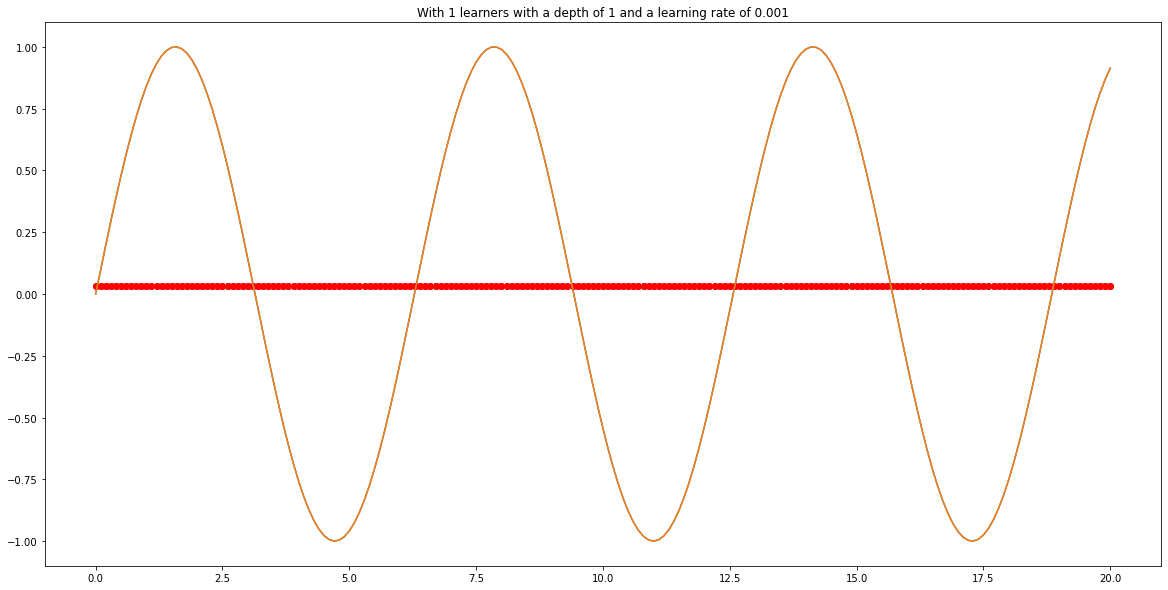

In [24]:
simple_boosting_algorithm(X=X,
                          y=y,
                          n_learners=1,
                          learner=DecisionTreeRegressor(max_depth=1),
                          learning_rate=0.001,
                          show_each_step=True)

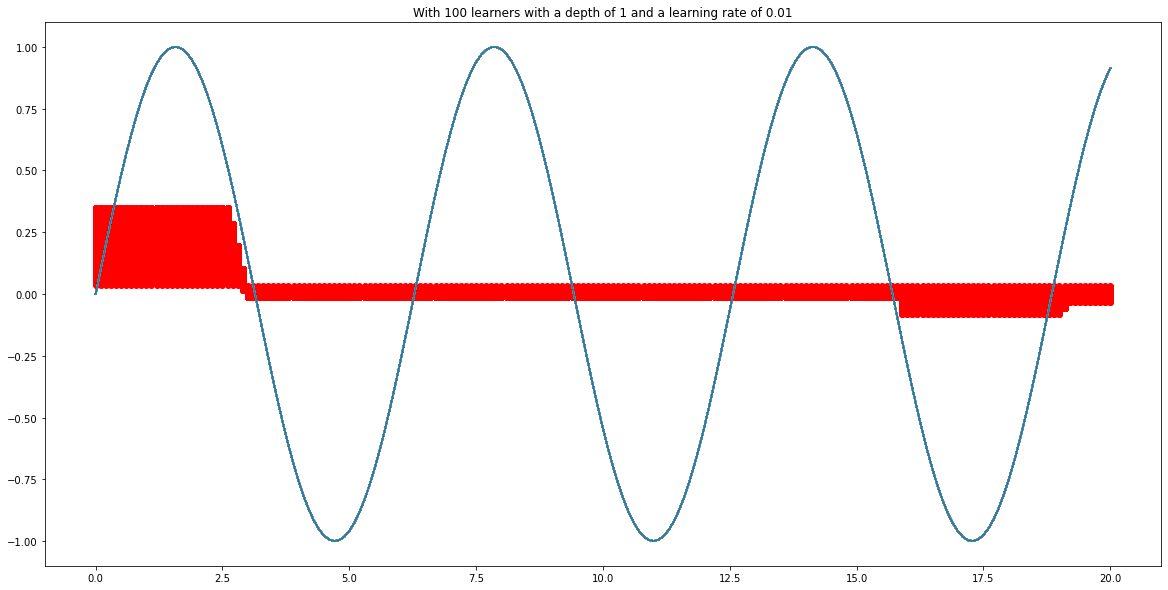

In [25]:
simple_boosting_algorithm(X=X,
                          y=y,
                          n_learners=100,
                          learner=DecisionTreeRegressor(max_depth=1),
                          learning_rate=0.01,
                          show_each_step=True)

In [ ]:
# 7 min run time
# simple_boosting_algorithm(X=X,
#                           y=y,
#                           n_learners=10000,
#                           learner=DecisionTreeRegressor(max_depth=1),
#                           learning_rate=0.001,
#                           show_each_step=True)

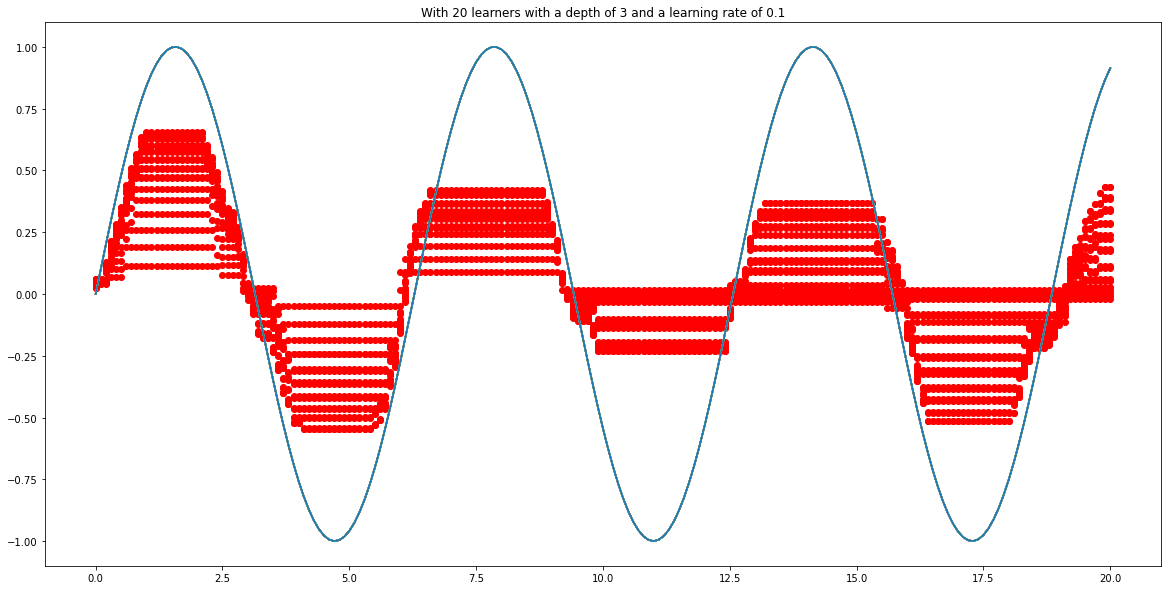

In [33]:
simple_boosting_algorithm(X=X,
                          y=y,
                          n_learners=20,
                          learner=DecisionTreeRegressor(max_depth=3),
                          learning_rate=0.1,
                          show_each_step=True)

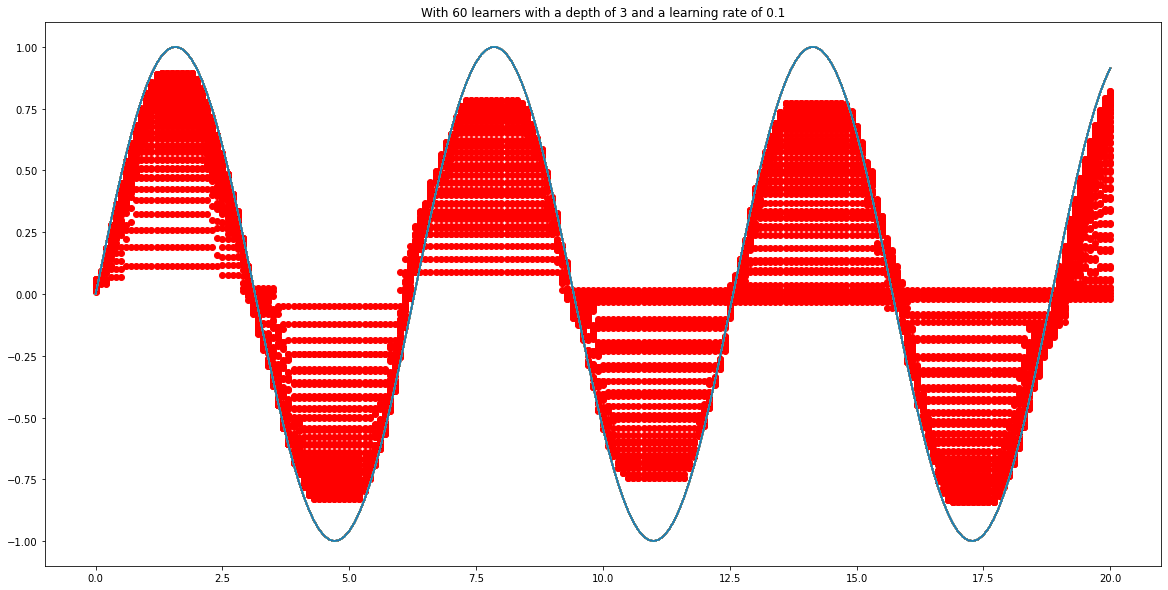

In [34]:
simple_boosting_algorithm(X=X,
                          y=y,
                          n_learners=60,
                          learner=DecisionTreeRegressor(max_depth=3),
                          learning_rate=0.1,
                          show_each_step=True)

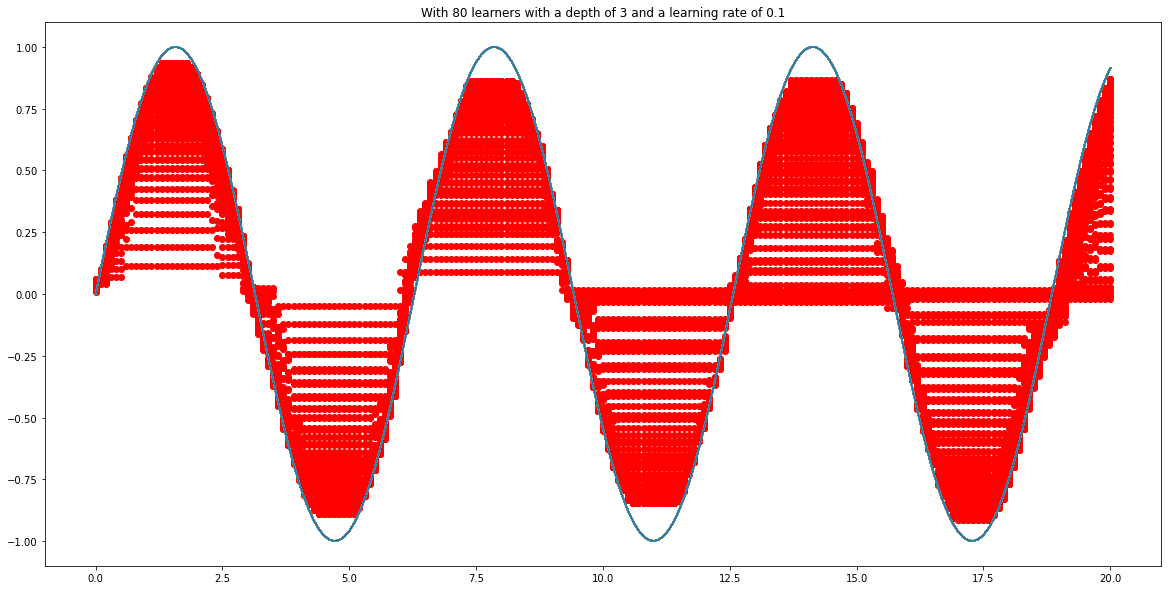

In [35]:
simple_boosting_algorithm(X=X,
                          y=y,
                          n_learners=80,
                          learner=DecisionTreeRegressor(max_depth=3),
                          learning_rate=0.1,
                          show_each_step=True)

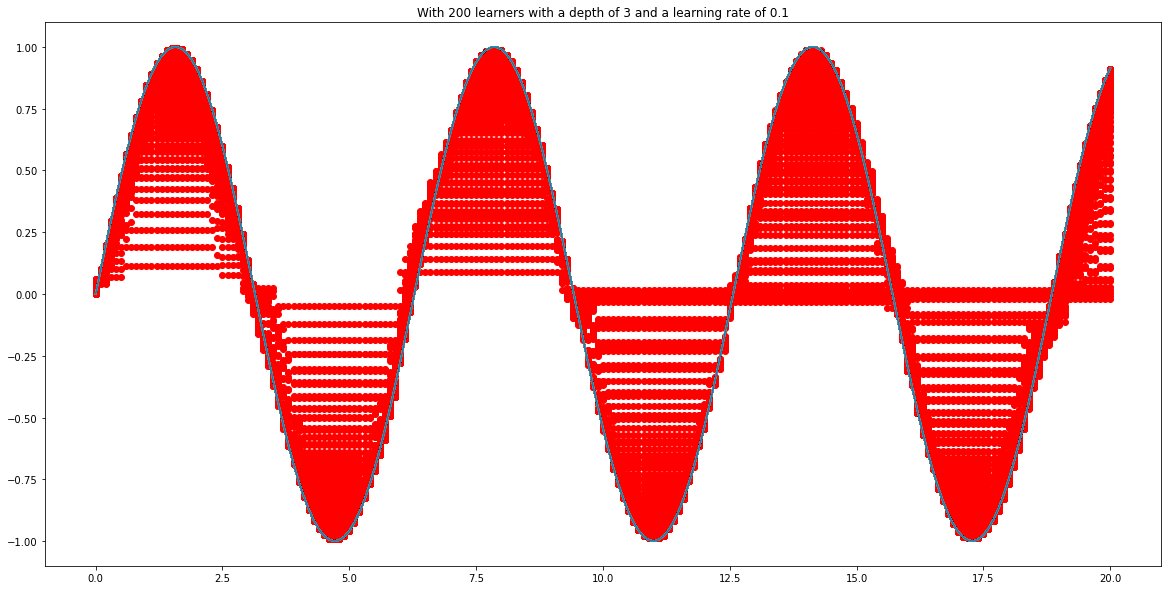

In [36]:
simple_boosting_algorithm(X=X,
                          y=y,
                          n_learners=200,
                          learner=DecisionTreeRegressor(max_depth=3),
                          learning_rate=0.1,
                          show_each_step=True)

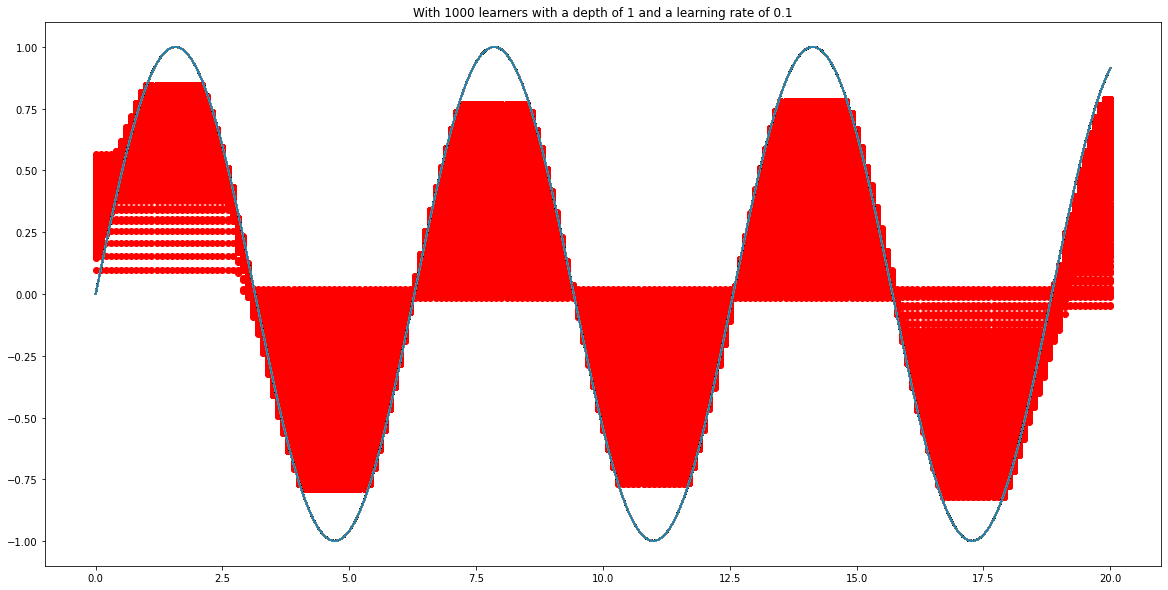

In [30]:
simple_boosting_algorithm(X=X,
                          y=y,
                          n_learners=1000,
                          learner=DecisionTreeRegressor(max_depth=1),
                          learning_rate=0.1,
                          show_each_step=True)